In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# ArmedAngels Clothes

In [2]:
df_Armed_clothes = pd.read_csv("armed_cloth.csv")

In [3]:
df_Armed_clothes.head()

,Unnamed: 0,product_id,gender,clothes,color,price,label1,label2,label3
0,0,7930,Femme,Hose,\r\nwarm blue\r\n,"\r\n69,9",PETA approved vegan,NaN,NaN
1,1,4583,Homme,Sweatshirt,\r\nmorning sky\r\n,"\r\n69,9","GRS, CU-1085700",PETA approved vegan,NaN
2,2,2609,Homme,Jeans,\r\nshower\r\n,"\r\n119,9",PETA approved vegan,NaN,NaN
3,3,6175,Femme,Jeans,\r\nwashed down black\r\n,"\r\n99,9","GOTS, organic, CU-1085700",PETA approved vegan,NaN
4,4,1789,Femme,Jeans,\r\nbasic\r\n,"\r\n99,9","GOTS, organic, CU-1085700",PETA approved vegan,NaN


In [4]:
df_Armed_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  59 non-null     int64  
 1   product_id  59 non-null     int64  
 2   gender      59 non-null     object 
 3   clothes     59 non-null     object 
 4   color       59 non-null     object 
 5   price       59 non-null     object 
 6   label1      58 non-null     object 
 7   label2      45 non-null     object 
 8   label3      0 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.3+ KB


## Clean Data_frame_clothes

In [5]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_Armed_clothes.drop(columns = ["Unnamed: 0", "label3"], inplace = True)

#nettoyer la colonne price et modifier le  type en float
df_Armed_clothes['price'] = df_Armed_clothes['price'].astype(str)
df_Armed_clothes['price'] = df_Armed_clothes['price'].str.replace(',', '.')
df_Armed_clothes['price'] = df_Armed_clothes['price'].apply(lambda x : x.split('\n')[1])
df_Armed_clothes['price'] = df_Armed_clothes['price'].astype(float)

#nettoyage de la colonne color
df_Armed_clothes['color'] = df_Armed_clothes['color'].str.replace('\n','').str.replace('\r','')

#nettoyer les colonnes label1 et label2
df_Armed_clothes['label1'] = df_Armed_clothes['label1'].astype(str)
df_Armed_clothes['label2'] = df_Armed_clothes['label2'].astype(str)
df_Armed_clothes["label1"] = df_Armed_clothes["label1"].apply(lambda x : x.split(" ")[0])
df_Armed_clothes["label2"] = df_Armed_clothes["label2"].apply(lambda x : x.split(" ")[0])
df_Armed_clothes['label1'] = df_Armed_clothes['label1'].str.replace(",","")


# modifier le type de product_id en string
df_Armed_clothes['product_id'] = df_Armed_clothes['product_id'].astype(str)

#Mettre les champs en minuscules
df_Armed_clothes = df_Armed_clothes.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_Armed_clothes.rename(columns=lambda x: x.lower(), inplace=True)


df_Armed_clothes.head()

,product_id,gender,clothes,color,price,label1,label2
0,7930,femme,hose,warm blue,69.9,peta,nan
1,4583,homme,sweatshirt,morning sky,69.9,grs,peta
2,2609,homme,jeans,shower,119.9,peta,nan
3,6175,femme,jeans,washed down black,99.9,gots,peta
4,1789,femme,jeans,basic,99.9,gots,peta


In [6]:
df_Armed_clothes["clothes"].unique()

array(['hose', 'sweatshirt', 'jeans', 't-shirt', 'shorts'], dtype=object)

In [7]:
category_mapping = {'t-shirt' : 'Hauts', 'hose' : 'Bas', 'sweatshirt' : 'Hauts', 'jeans' : 'Bas', 'shorts' : 'Bas'}

df_Armed_clothes['clothes'] = df_Armed_clothes['clothes'].replace(category_mapping)
df_Armed_clothes.rename(columns = {"clothes":"categories_clothes"} , inplace=True)
df_Armed_clothes.categories_clothes.unique()

array(['Bas', 'Hauts'], dtype=object)

In [8]:
df_Armed_clothes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          59 non-null     object 
 1   gender              59 non-null     object 
 2   categories_clothes  59 non-null     object 
 3   color               59 non-null     object 
 4   price               59 non-null     float64
 5   label1              59 non-null     object 
 6   label2              59 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.4+ KB


## DATA Visualisation 

Text(0.5, 0, 'prix')

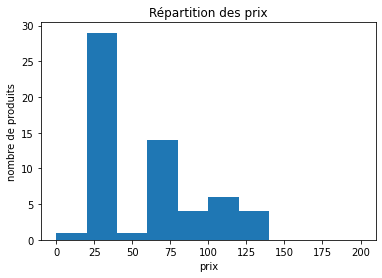

In [9]:
plt.hist(df_Armed_clothes["price"], bins = 10, range = (0,200))
plt.title("Répartition des prix")
plt.ylabel("nombre de produits")
plt.xlabel("prix")

# Armed_composition

In [10]:
df_Armed_composition = pd.read_csv("armed_composition.csv")

In [11]:
df_Armed_composition.head()

,Unnamed: 0,product_id,material,percentage
0,0,7930,viscose (LENZING™ ECOVERO™),96.0
1,1,7930,élasthanne,4.0
2,2,4583,coton (biologique),50.0
3,3,4583,coton (recyclé),50.0
4,4,2609,coton (recyclé),100.0


In [12]:
df_Armed_composition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  91 non-null     int64  
 1   product_id  91 non-null     int64  
 2   material    91 non-null     object 
 3   percentage  91 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ KB


## Clean Data_frame_compositions

In [13]:
df_Armed_composition["material"].unique()

array(['viscose (LENZING™ ECOVERO™)', 'élasthanne', 'coton (biologique)',
       'coton (recyclé)', 'polyester (recyclé)', 'coton (recyclÃ©)',
       'Spandex', 'de laine de bœuf (biologique)',
       'de laine de bœuf (réutilisée)'], dtype=object)

In [14]:
#Supprimer la colonne "unnamed: 0 car elle ne sert à rien"
df_Armed_composition.drop(columns = "Unnamed: 0", inplace = True)

# modifier le type de product_id en string
df_Armed_composition['product_id'] = df_Armed_composition['product_id'].astype(str)

#Mettre les champs en minuscules
df_Armed_composition = df_Armed_composition.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Mettre les noms de colonnes en minuscules
df_Armed_composition.rename(columns=lambda x: x.lower(), inplace=True)

#Créer un dictionaire pour les modifications
mapping_material = {'coton (biologique)' : 'coton (bio)', 'coton (recyclã©)' : 'coton (recyclé)', 'elasthan' : 'élasthanne',
                   'hanffaser' : 'Fibre de chanvre', 'baumwool (biologique)' : 'coton (bio)', 'spandex' : 'élasthanne'}

#Appliquer les modifications grâce au dictionnaire précédent
df_Armed_composition['material'] = df_Armed_composition['material'].replace(mapping_material)

df_Armed_composition.head()

,product_id,material,percentage
0,7930,viscose (lenzing™ ecovero™),96.0
1,7930,élasthanne,4.0
2,4583,coton (bio),50.0
3,4583,coton (recyclé),50.0
4,2609,coton (recyclé),100.0


In [15]:
df_Armed_composition["material"].unique()

array(['viscose (lenzing™ ecovero™)', 'élasthanne', 'coton (bio)',
       'coton (recyclé)', 'polyester (recyclé)',
       'de laine de bœuf (biologique)', 'de laine de bœuf (réutilisée)'],
      dtype=object)

## DATA Visualisation

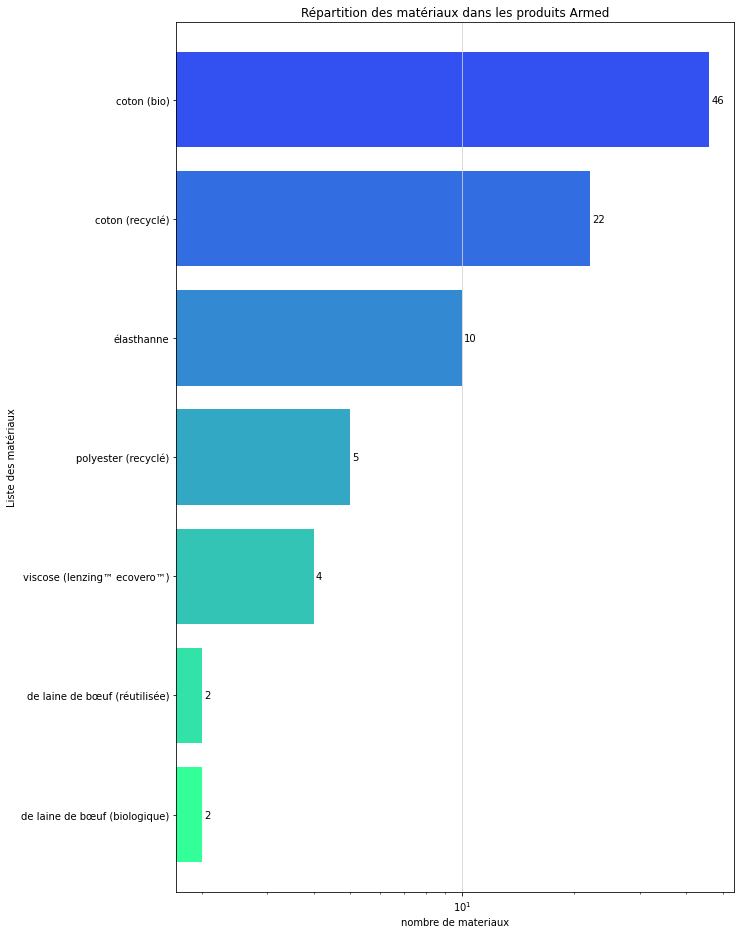

In [16]:
nbre_col_unique = len(df_Armed_composition["material"].unique())
cmap = plt.get_cmap('winter_r')
norm = Normalize(vmin=0, vmax=nbre_col_unique)
opts = dict( 
    kind='barh',   #indique que nous allons tracer un graphique en barres horizontales
    width=0.8,     #définit la largeur des barres
    figsize = (10,16), #définit la taille de la figure à 5 pouces de large et 8 pouces de hauteur
    xlabel = 'Liste des matériaux',  #définit l'étiquette de l'axe x
    color = cmap(norm(sorted((list(range(nbre_col_unique)))))), # définit la couleur des barres en utilisant une colormap (cmap) normalisée (norm) basée
    legend = False, #désactive l'affichage de la légende
    alpha = 0.8  #définit la transparence des barres 
)

ax = ( 
    df_Armed_composition.groupby("material")
    .size()
    .sort_values(ascending=True)
    .plot(y='nombre de materiaux', **opts)
)

ax.set_xscale("log")
ax.set_xlabel("nombre de materiaux")

ax.bar_label(ax.containers[0],padding=2)
ax.set_title('Répartition des matériaux dans les produits Armed')
ax.grid(axis='x', color='lightgrey', zorder=10)

# ArmedAngels Supplier

In [17]:
df_Armed_supplier = pd.read_csv("armed_supplier.csv")

In [18]:
df_Armed_supplier.head()

,Unnamed: 0,product_id,company,country
0,0,7930,Valerius Valérius Têxteis S.A.,"Barcelos, Portugal"
1,1,4583,Valerius Valérius Têxteis S.A.,"Barcelos, Portugal"
2,2,2609,Denim Authority,"Ras Jebel, Tunisie"
3,3,6175,Denim Authority,"Ras Jebel, Tunisie"
4,4,1789,Denim Authority,"Ras Jebel, Tunisie"


In [19]:
df_Armed_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  59 non-null     int64 
 1   product_id  59 non-null     int64 
 2   company     59 non-null     object
 3   country     59 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


## Clean Data_frame_supplier

In [20]:
#supprimer la colonne Unnamed: 0 car elle ne sert à rien
df_Armed_supplier.drop(columns = "Unnamed: 0", inplace = True)

#Mettre les champs en minuscules
df_Armed_supplier = df_Armed_supplier.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# modifier le type de product_id en string
df_Armed_supplier['product_id'] = df_Armed_supplier['product_id'].astype(str)

#Récupérer uniquement le pays et pas les ville dans la colonne country
df_Armed_supplier["country"] = df_Armed_supplier["country"].astype(str)
df_Armed_supplier["country"] = df_Armed_supplier["country"].apply(lambda x : x.split(", ")[1])

In [21]:
df_Armed_supplier.head()

,product_id,company,country
0,7930,valerius valérius têxteis s.a.,portugal
1,4583,valerius valérius têxteis s.a.,portugal
2,2609,denim authority,tunisie
3,6175,denim authority,tunisie
4,1789,denim authority,tunisie


In [40]:
df_Armed_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  59 non-null     object
 1   company     59 non-null     object
 2   country     59 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


## DATA Visualisation

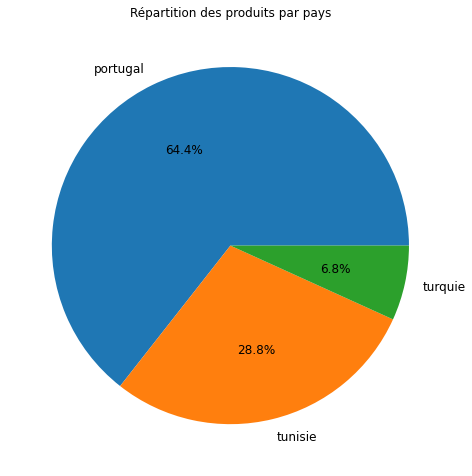

In [22]:
# Regrouper les produits par pays et compter le nombre de produits pour chaque pays
produits_par_pays = (
    df_Armed_supplier
    .groupby('country')
    .agg(nombre_produits=("product_id", "count"))
    .reset_index()
)

# Calculer le pourcentage pour chaque tranche
produits_par_pays['pourcentage'] = produits_par_pays['nombre_produits'] / produits_par_pays['nombre_produits'].sum() * 100

# Regrouper les pays avec un pourcentage inférieur à 2% dans une seule catégorie "Autres"
seuil = 2
produits_par_pays.loc[produits_par_pays['pourcentage'] < seuil, 'country'] = 'Autres'
produits_par_pays = (
    produits_par_pays
    .groupby('country')
    .agg(nombre_produits=("nombre_produits", "sum"), pourcentage=("pourcentage", "sum"))
    .sort_values(by = "nombre_produits",ascending = False)
    .reset_index()
)


# Tracer le diagramme circulaire à l'aide de matplotlib
plt.figure(figsize=(8,10))
plt.pie(
    produits_par_pays['nombre_produits'], 
    labels=produits_par_pays['country'], 
    autopct=lambda pct: f"{pct:.1f}%" if pct >= seuil else "",
    textprops={'fontsize': 12}
)
plt.title('Répartition des produits par pays')
plt.show()

# DATA Armed

In [41]:
df_Armed = pd.merge(df_Armed_composition, df_Armed_clothes, on = "product_id", how = "left")

In [42]:
df_Armed = df_Armed.merge(df_Armed_supplier, on = "product_id", how = "left")

In [43]:
df_Armed.head()

,product_id,material,percentage,gender,categories_clothes,color,price,label1,label2,company,country
0,7930,viscose (lenzing™ ecovero™),96.0,femme,Bas,warm blue,69.9,peta,nan,valerius valérius têxteis s.a.,portugal
1,7930,élasthanne,4.0,femme,Bas,warm blue,69.9,peta,nan,valerius valérius têxteis s.a.,portugal
2,4583,coton (bio),50.0,homme,Hauts,morning sky,69.9,grs,peta,valerius valérius têxteis s.a.,portugal
3,4583,coton (recyclé),50.0,homme,Hauts,morning sky,69.9,grs,peta,valerius valérius têxteis s.a.,portugal
4,2609,coton (recyclé),100.0,homme,Bas,shower,119.9,peta,nan,denim authority,tunisie


In [47]:
df_Armed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          103 non-null    object 
 1   material            103 non-null    object 
 2   percentage          103 non-null    float64
 3   gender              103 non-null    object 
 4   categories_clothes  103 non-null    object 
 5   color               103 non-null    object 
 6   price               103 non-null    float64
 7   label1              103 non-null    object 
 8   label2              103 non-null    object 
 9   company             103 non-null    object 
 10  country             103 non-null    object 
dtypes: float64(2), object(9)
memory usage: 9.7+ KB


In [44]:
# suppression des lignes dupliquée
print(" nous avons", df_Armed[df_Armed.duplicated()].shape[0], "lignes dupliquées et nous allons les supprimer")
df_Armed.drop_duplicates(inplace=True)

 nous avons 0 lignes dupliquées et nous allons les supprimer


In [46]:
print("nous avons scrapé: ",df_Armed.product_id.unique().shape[0], "produits différents de AngelArmed, et pour chaque produit "
      "nous avons récupérré les caractéristiques suivantes : ", df_Armed.columns.tolist())

nous avons scrapé:  58 produits différents de H&M, et pour chaque produit nous avons récupérré les caractéristiques suivantes :  ['product_id', 'material', 'percentage', 'gender', 'categories_clothes', 'color', 'price', 'label1', 'label2', 'company', 'country']


**_Remarque_**: Un produit peut être composé de différents matériaux c'est pour ça que notre dataframe contient 103 lignes

# Analyse

### Material, categories_ clothes, Country

In [27]:
df_Armed.groupby(['material', 'categories_clothes'])['country'].agg(lambda x: list(set(x))).reset_index()

,material,categories_clothes,country
0,coton (bio),Bas,"[portugal, turquie, tunisie]"
1,coton (bio),Hauts,"[portugal, tunisie]"
2,coton (recyclé),Bas,"[portugal, turquie, tunisie]"
3,coton (recyclé),Hauts,"[portugal, tunisie]"
4,de laine de bœuf (biologique),Bas,"[portugal, tunisie]"
5,de laine de bœuf (biologique),Hauts,"[portugal, tunisie]"
6,de laine de bœuf (réutilisée),Bas,"[portugal, tunisie]"
7,de laine de bœuf (réutilisée),Hauts,"[portugal, tunisie]"
8,polyester (recyclé),Bas,"[turquie, tunisie]"
9,viscose (lenzing™ ecovero™),Bas,[portugal]
